<h1>Explore Data</h1>

In [97]:
import pandas as pd
import numpy as np

icu_stays = pd.read_csv('MIMIC_Data/ICUSTAYS.csv')
admissions = pd.read_csv('MIMIC_Data/ADMISSIONS.csv')
patients = pd.read_csv('MIMIC_Data/PATIENTS.csv')

In [124]:
print('ICU columns')
print(icu_stays.columns)

print('\nAdmissions columns')
print(admissions.columns)

print('\nPatients columns')
print(patients.columns)

ICU columns
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID',
       'INTIME', 'OUTTIME', 'LOS'],
      dtype='object')

Admissions columns
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

Patients columns
Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG', 'AGE'],
      dtype='object')


<h1>Problem 1</h1>

In [99]:
# First start with retrieving ‘subject_id’, ‘hadm_id’, ‘icustay_id’, ‘intime’, and ‘outtime’ from the ‘icustays’ table.

icu_data = icu_stays[['HADM_ID','ICUSTAY_ID', 'INTIME', 'OUTTIME']]
icu_data.head()

,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME
0,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11
1,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57
2,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29
3,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04
4,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13


In [100]:
# Using the patients table retrieve the calculated age of patients.

patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [101]:
patients.describe()

,ROW_ID,SUBJECT_ID,EXPIRE_FLAG
count,46520.000000,46520.000000,46520.000000
mean,23260.500000,34425.772872,0.338758
std,13429.311598,28330.400343,0.473292
min,1.000000,2.000000,0.000000
25%,11630.750000,12286.750000,0.000000
50%,23260.500000,24650.500000,0.000000
75%,34890.250000,55477.500000,1.000000
max,46520.000000,99999.000000,1.000000


In [102]:
# There are null values in the DOB and DOD_HOSP and DOD_SSN columns, how many null values are there?
DOD, DOD_hosp, DOD_ssn = patients.isnull().sum()[4], patients.isnull().sum()[5], patients.isnull().sum()[6]
num_rows = patients.size
print("There are %d patients\n" %(num_rows))

# What percentage of the columns are null?
print('DOD percent null %f' %(DOD / num_rows))
print('DOD_hosp percent null %f' %(DOD_hosp / num_rows))
print('DOD_ssn percent null %f' %(DOD_ssn / num_rows))

There are 372160 patients

DOD percent null 0.082655
DOD_hosp percent null 0.098200
DOD_ssn percent null 0.089053


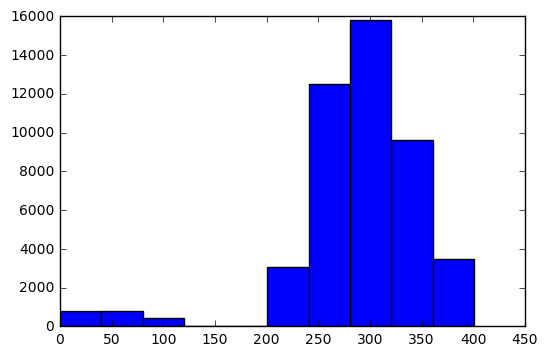

minAge is 1800
maxAge is 2098
Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG', 'AGE'],
      dtype='object')


In [103]:
import matplotlib.pyplot as plt

# Separate neonates from adult patients.
# Compute patient age based on current date?
# The minimum year is 1800

minAge = 100000
maxAge = 0
ages = []
for dob in patients['DOB']:
    year = int(dob.split()[0].split('-')[0])
    minAge = min(minAge, year)
    maxAge = max(minAge, year)
    ages.append(year - 1800)
  
# Display a histogram of the distribution of ages
plt.hist(ages)
plt.show()

patients['AGE'] = pd.Series(ages, index=patients.index)
print('minAge is %d' %(minAge))
print('maxAge is %d' %(maxAge))
print(patients.columns)

<h1>Problem 2</h1>

In [104]:
# Separate neonates from adult patients.
# There is a clear division of patients younger than 150 and patients older than 150

neonates = patients.loc[patients['AGE'] < 150]
adults = patients.loc[patients['AGE'] >= 150]


<h1>Problem 3</h1>

In [105]:
# By incorporating the admissions table, find how long each stay was BEFORE the patients were admitted to the ICU

print(admissions.head())
print(admissions.columns)

   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

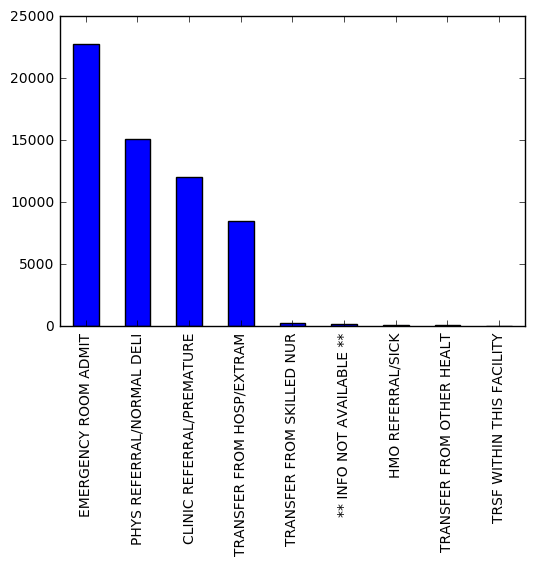

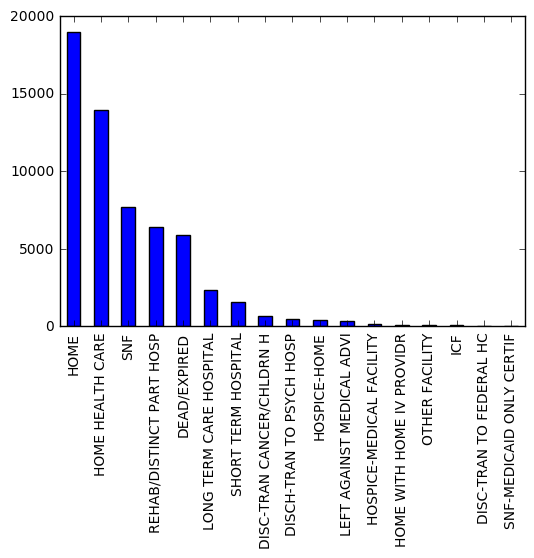

['EMERGENCY ROOM ADMIT' 'PHYS REFERRAL/NORMAL DELI'
 'TRANSFER FROM HOSP/EXTRAM' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM SKILLED NUR' 'HMO REFERRAL/SICK'
 'TRANSFER FROM OTHER HEALT' '** INFO NOT AVAILABLE **'
 'TRSF WITHIN THIS FACILITY']
['DISC-TRAN CANCER/CHLDRN H' 'HOME HEALTH CARE' 'HOME' 'DEAD/EXPIRED'
 'REHAB/DISTINCT PART HOSP' 'LONG TERM CARE HOSPITAL'
 'DISC-TRAN TO FEDERAL HC' 'SNF' 'SHORT TERM HOSPITAL'
 'HOSPICE-MEDICAL FACILITY' 'HOME WITH HOME IV PROVIDR' 'HOSPICE-HOME'
 'LEFT AGAINST MEDICAL ADVI' 'DISCH-TRAN TO PSYCH HOSP' 'OTHER FACILITY'
 'ICF' 'SNF-MEDICAID ONLY CERTIF']


In [106]:
# What are the possible locations for admission and discharge?

admissions['ADMISSION_LOCATION'].value_counts().plot(kind='bar')
plt.show()

admissions['DISCHARGE_LOCATION'].value_counts().plot(kind='bar')
plt.show()

print(admissions['ADMISSION_LOCATION'].unique())
print(admissions['DISCHARGE_LOCATION'].unique())

In [107]:
# Determine how many ICU_stays each HADM has

counts = icu_data['HADM_ID'].value_counts()

print(len([count for count in counts if count > 1]))

# Thus there are 3260 hospital stays with over 1 ICU stay

3260


ICUSTAY_ID                  0
INTIME                      0
OUTTIME                    10
ROW_ID                      0
SUBJECT_ID                  0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               54923
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                26154
RELIGION                  480
MARITAL_STATUS          10240
ETHNICITY                   0
EDREGTIME               28760
EDOUTTIME               28760
DIAGNOSIS                   1
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64


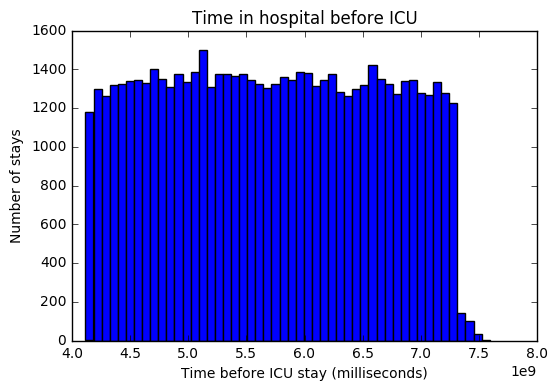

In [130]:
# Join the ICU table and the admissions table by HADM_ID
# Then add a new column that subtracts the times
# Convert the string dates into datetime objects and subtract to get the time 

import time
import datetime

joined = icu_data.set_index('HADM_ID').join(admissions.set_index('HADM_ID'))

times = []
stamps = []

# There are null values for outtime thus these will be ignored
print(joined.isnull().sum())


for i in range(len(joined)):
    timeIn = datetime.datetime.strptime(joined.iloc[i]['INTIME'], "%Y-%m-%d %H:%M:%S")
    
    if not isinstance(joined.iloc[i]['OUTTIME'], float):
        timeOut = datetime.datetime.strptime(joined.iloc[i]['OUTTIME'], "%Y-%m-%d %H:%M:%S")
        t = time.mktime(datetime.datetime.strptime(joined.iloc[i]['INTIME'], "%Y-%m-%d %H:%M:%S").timetuple())
        stamps.append(t)
        times.append(timeOut - timeIn)

plt.hist(stamps, bins=50)
plt.xlabel('Time before ICU stay (milliseconds)')
plt.ylabel('Number of stays')
plt.title('Time in hospital before ICU')
plt.show()

In [43]:
# Dataframe join practice
# If a certain column has multiple of a certain value, the join operation will create all permutations

caller = pd.DataFrame({'name': ['A', 'A', 'C'],
                       'number': ['0', '1', '2']})
receiver = pd.DataFrame({'name': ['A', 'A'],
                        'info': ['5', '6']})

caller.set_index('name').join(receiver.set_index('name'))

,number,info
name,,
A,0,5
A,0,6
A,1,5
A,1,6
C,2,NaN


<h1>Problem 4</h1>

In [127]:
# Find how many deaths occurred when the patient is in hospital and how many when patient in ICU

deathHosp = 0
deathICU = 0

# First check if the deathtime is null or not
for i in range(len(joined)):
    # if it is a float, then it is null
    if not isinstance(joined.iloc[i]['OUTTIME'], float) and not isinstance(joined.iloc[i]['DEATHTIME'], float): 
        # Convert the string into a time and compare against ICU times
        ICUin = datetime.datetime.strptime(joined.iloc[i]['INTIME'], "%Y-%m-%d %H:%M:%S")
        ICUout = datetime.datetime.strptime(joined.iloc[i]['OUTTIME'], "%Y-%m-%d %H:%M:%S")
        deathTime = datetime.datetime.strptime(joined.iloc[i]['DEATHTIME'], "%Y-%m-%d %H:%M:%S")
        
        if deathTime > ICUin and deathTime < ICUout:
            deathICU += 1 # Died in ICU
        else:
            deathHosp += 1 # Died in hospital
            
print('Number of deaths in ICU: %d' %(deathICU))
print('Number of deaths in hospital: %d' %(deathHosp))


Number of deaths in ICU: 4224
Number of deaths in hospital: 2384
